In [1]:
import numpy as np
from sklearn import metrics
import pandas as pd

models = [
    "gpt-3.5-turbo", "gpt-4-0314", "text-davinci-003"
]
runs = [
    'final_run_2','final_run_3', 'final_run_4'
]
            
   

In [2]:
 
total_sequences = 225
consistency_results = []
for answer_validity in ['valid', 'all']:
    for model in models:
        for run in runs:
            df = pd.read_csv(
                    f'./consistency/{run}/compute_dependence_with_base_changes=False,sequence_completion_capability=False,sequence_completion_equality.model={model},string_transformation_completion_equality=False/evaluate_sequence_completion_equality/sequence_completion_equality_evaluation_{model}.csv'
            )
            
            match_accs, model_match_accs, model_consistency_accs, consistent_and_matched_positive, consistent_and_matched_negative = (
                [],
                [],
                [],
                [],
                []
            )
            match_accs_self_consistent = []
            

            for i, data in df.iterrows():
                match_accs.append(1 if data["generated_completion_matches"] == True else 0)
                match_accs_self_consistent.append(1
                        if data["model_self_consistency_evaluation"].strip() == "Y"
                        else 0)

            for i, data in df.iterrows():
                model_match_accs.append(1 if data["model_completion_matches"] == True else 0)

            for i, data in df.iterrows():
                if answer_validity == 'valid' and data["model_self_consistency_evaluation"].strip() != "Y" and data["model_self_consistency_evaluation"].strip() != "N":
                    continue
                model_consistency_accs.append(
                    1 if data["model_self_consistency_evaluation"].strip() == "Y" else 0
                )

            for i, data in df.iterrows():
                if answer_validity == 'valid' and data["model_self_consistency_evaluation"].strip() != "Y" and data["model_self_consistency_evaluation"].strip() != "N":
                    continue
                if data["generated_completion_matches"]:
                    consistent_and_matched_positive.append(
                        1
                        if data["model_self_consistency_evaluation"].strip() == "Y"
                        else 0
                    )
                else:
                    consistent_and_matched_negative.append(
                        1
                        if data["model_self_consistency_evaluation"].strip() == "N"
                        else 0
                    )
                    


            ground_truth_consistent = np.mean(match_accs)
            self_rule_following_consistency = np.mean(model_match_accs)
            self_comparison_consistency = np.mean(model_consistency_accs)
            consistent_and_matched_positive_acc = np.mean(consistent_and_matched_positive)
            consistent_and_matched_negative_acc = np.mean(consistent_and_matched_negative)
            self_consistency_precision = metrics.precision_score(match_accs, match_accs_self_consistent)
            self_consistency_recall = metrics.recall_score(match_accs, match_accs_self_consistent)
            self_consistency_f1 = metrics.f1_score(match_accs, match_accs_self_consistent)
            print(
                f"""
                For {run} run {model} including {answer_validity} answers
                Evaluated {len(df)} ambiguous sequences of {total_sequences} total.
                Resulting in:
                - {ground_truth_consistent}% ground-truth-consistent (using {len(match_accs)})
                - {self_rule_following_consistency}% self-rule-following-consistency (using {len(model_match_accs)})
                - {self_comparison_consistency}% self-comparison-consistency (using {len(model_consistency_accs)})
                - {consistent_and_matched_positive_acc}% self-comparison-consistency==Y and ground-truth-consistent. (using {len(consistent_and_matched_positive)})
                - {consistent_and_matched_negative_acc}% self-comparison-consistency==N and not ground-truth-consistent. (using {len(consistent_and_matched_negative)})
                - {self_consistency_precision} precision
                - {self_consistency_recall} recall
                - {self_consistency_f1} f1
                """
            )
            


            consistency_results.append({
                "model": model,
                "run": run,
                "answer_validity": answer_validity,
                "ground_truth_consistent": round(ground_truth_consistent * 100, 2),
                "ground_truth_consistent_num": len(match_accs),
                "self_rule_following_consistency":  round(self_rule_following_consistency * 100, 2), 
                "self_rule_following_consistency_len": len(model_match_accs),
                "self_comparison_consistency": round(self_comparison_consistency * 100, 2),
                "self_comparison_consistency_len": len(model_consistency_accs),
                "consistent_and_matched_positive": round(consistent_and_matched_positive_acc * 100, 2),
                "consistent_and_matched_positive_len": len(consistent_and_matched_positive),
                "consistent_and_matched_negative": round(consistent_and_matched_negative_acc * 100, 2),
                "consistent_and_matched_negative_len": len(consistent_and_matched_negative),
                "self_consistency_precision": self_consistency_precision,
                "self_consistency_recall": self_consistency_recall,
                "self_consistency_f1": self_consistency_f1,
            })

consistency_df = pd.DataFrame(consistency_results)
consistency_df.to_csv('./q0_consistency_results_final.csv')


                For final_run_2 run gpt-3.5-turbo including valid answers
                Evaluated 344 ambiguous sequences of 225 total.
                Resulting in:
                - 0.6511627906976745% ground-truth-consistent (using 344)
                - 0.6831395348837209% self-rule-following-consistency (using 344)
                - 0.8372093023255814% self-comparison-consistency (using 344)
                - 0.9419642857142857% self-comparison-consistency==Y and ground-truth-consistent. (using 224)
                - 0.35833333333333334% self-comparison-consistency==N and not ground-truth-consistent. (using 120)
                - 0.7326388888888888 precision
                - 0.9419642857142857 recall
                - 0.82421875 f1
                

                For final_run_3 run gpt-3.5-turbo including valid answers
                Evaluated 136 ambiguous sequences of 225 total.
                Resulting in:
                - 0.8088235294117647% ground-truth-consistent (


                For final_run_2 run gpt-4-0314 including all answers
                Evaluated 336 ambiguous sequences of 225 total.
                Resulting in:
                - 0.7083333333333334% ground-truth-consistent (using 336)
                - 0.7797619047619048% self-rule-following-consistency (using 336)
                - 0.7023809523809523% self-comparison-consistency (using 336)
                - 0.8067226890756303% self-comparison-consistency==Y and ground-truth-consistent. (using 238)
                - 0.5510204081632653% self-comparison-consistency==N and not ground-truth-consistent. (using 98)
                - 0.8135593220338984 precision
                - 0.8067226890756303 recall
                - 0.8101265822784811 f1
                

                For final_run_3 run gpt-4-0314 including all answers
                Evaluated 137 ambiguous sequences of 225 total.
                Resulting in:
                - 0.9124087591240876% ground-truth-consistent (usin

In [3]:
new_df_1 = consistency_df[['model', 'run', 'ground_truth_consistent']].rename(columns={'ground_truth_consistent': 'score'})
new_df_1['score_type'] = 'Ground truth consistent'
new_df_2 = consistency_df[['model', 'run', 'self_rule_following_consistency']].rename(columns={'self_rule_following_consistency': 'score'})
new_df_2['score_type'] = 'Self-rule following consistency'
new_df_3 = consistency_df[['model', 'run', 'self_comparison_consistency']].rename(columns={'self_comparison_consistency': 'score'})
new_df_3['score_type'] = 'Self comparison consistency'

new_df = pd.concat([new_df_1, new_df_2, new_df_3])
new_df = new_df.sort_values(by=['run', 'score']).rename(columns={'run': 'sequence length', 'score_type': 'Consistency measure'})
new_df['sequence length'] = new_df['sequence length'].apply(lambda x: x.split('_')[-1])

In [4]:
import seaborn as sns

In [7]:
new_df = new_df[new_df['Consistency measure'] != 'Self-rule following consistency']

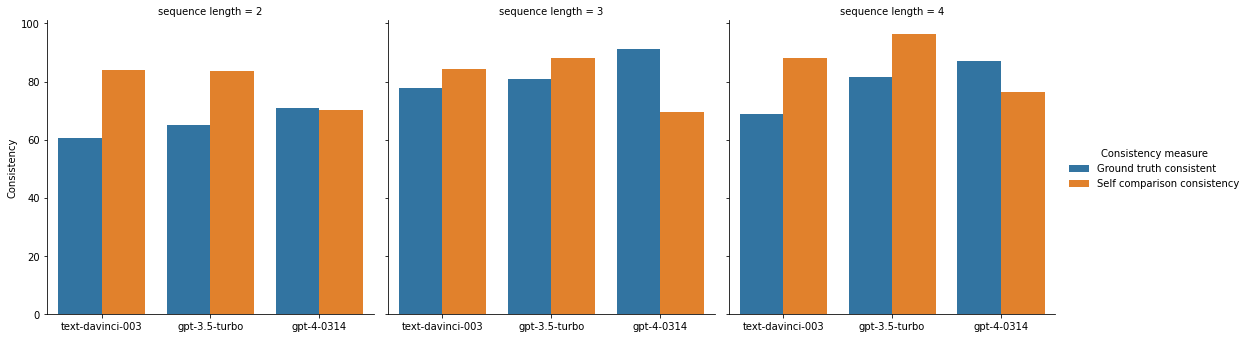

In [8]:
ax = sns.catplot(x="model", y="score", col="sequence length", hue="Consistency measure", data=new_df, kind="bar")
ax.set(ylabel='Consistency', xlabel = '')



In [9]:
import numpy as np
from sklearn import metrics
import pandas as pd
models = [
    "davinci", "gpt-3.5-turbo", "gpt-4-0314", "text-davinci-003"
]
runs = [
    'run_1', 'run_2', 'run_3'
]
total_sequences = 139
capability_results = []
for model in models:
    for run in runs:
        df = pd.read_csv(
                f'./capability/{run}/compute_dependence_with_base_changes=False,sequence_completion_capability.model={model},sequence_completion_equality=False,string_transformation_completion_equality=False/evaluate_sequence_completion_capability/sequence_completion_capability_evaluation_{model}.csv'
        )

        rule_accs, completion_accs = [], []


        for i, data in df.iterrows():
            rule_accs.append(1 if data["generated_rule_matches"] == True else 0)
            completion_accs.append(1
                    if data["generated_completion_matches"] == True
                    else 0)

        result = {
            "model": model,
            "run": run,
            "rule_matches_sequence": round(np.mean(rule_accs) * 100, 2),
            "completion_is_correct": round(np.mean(completion_accs) * 100, 2),
            "len_completed": len(df)
        }
        print(result)
        capability_results.append(result)

capability_df = pd.DataFrame(capability_results)
capability_df.to_csv('./q0_capability_results.csv')

{'model': 'davinci', 'run': 'run_1', 'rule_matches_sequence': 8.53, 'completion_is_correct': 34.88, 'len_completed': 129}
{'model': 'davinci', 'run': 'run_2', 'rule_matches_sequence': 14.29, 'completion_is_correct': 37.59, 'len_completed': 133}
{'model': 'davinci', 'run': 'run_3', 'rule_matches_sequence': 9.45, 'completion_is_correct': 31.5, 'len_completed': 127}
{'model': 'gpt-3.5-turbo', 'run': 'run_1', 'rule_matches_sequence': 40.77, 'completion_is_correct': 80.0, 'len_completed': 130}
{'model': 'gpt-3.5-turbo', 'run': 'run_2', 'rule_matches_sequence': 53.28, 'completion_is_correct': 83.61, 'len_completed': 122}
{'model': 'gpt-3.5-turbo', 'run': 'run_3', 'rule_matches_sequence': 46.62, 'completion_is_correct': 77.44, 'len_completed': 133}
{'model': 'gpt-4-0314', 'run': 'run_1', 'rule_matches_sequence': 61.11, 'completion_is_correct': 85.71, 'len_completed': 126}
{'model': 'gpt-4-0314', 'run': 'run_2', 'rule_matches_sequence': 64.29, 'completion_is_correct': 81.75, 'len_completed': 1

In [10]:
to_corr_df = consistency_df[consistency_df.answer_validity == 'valid'].groupby('model').mean().merge(
    capability_df.groupby('model').mean(), on=['model']
)
corr_df = to_corr_df[[
    'rule_matches_sequence', 'completion_is_correct', 
    'ground_truth_consistent', 'ground_truth_consistent_num',
       'self_rule_following_consistency',
       'self_comparison_consistency',
        'self_consistency_precision',
       'self_consistency_recall', 'self_consistency_f1',
    'rule_matches_sequence', 'completion_is_correct'
]].corr()
corr_df.to_csv('./q0_capability_consistency_corr.csv')

<ipython-input-10-77203dce5325>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_corr_df = consistency_df[consistency_df.answer_validity == 'valid'].groupby('model').mean().merge(
<ipython-input-10-77203dce5325>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capability_df.groupby('model').mean(), on=['model']


In [11]:
corr_df

,rule_matches_sequence,completion_is_correct,ground_truth_consistent,ground_truth_consistent_num,self_rule_following_consistency,self_comparison_consistency,self_consistency_precision,self_consistency_recall,self_consistency_f1,rule_matches_sequence,completion_is_correct
rule_matches_sequence,1.000000,0.843344,0.970099,-0.835045,0.950873,-0.883511,0.943792,-0.902652,-0.443244,1.000000,0.843344
completion_is_correct,0.843344,1.000000,0.948553,-0.999884,0.968274,-0.493392,0.973565,-0.529976,0.107895,0.843344,1.000000
ground_truth_consistent,0.970099,0.948553,1.000000,-0.943611,0.997579,-0.743404,0.995797,-0.771206,-0.212424,0.970099,0.948553
ground_truth_consistent_num,-0.835045,-0.999884,-0.943611,1.000000,-0.964348,0.480061,-0.969966,0.516974,-0.123054,-0.835045,-0.999884
self_rule_following_consistency,0.950873,0.968274,0.997579,-0.964348,1.000000,-0.695095,0.999755,-0.725073,-0.143960,0.950873,0.968274
self_comparison_consistency,-0.883511,-0.493392,-0.743404,0.480061,-0.695095,1.000000,-0.679021,0.999093,0.811495,-0.883511,-0.493392
self_consistency_precision,0.943792,0.973565,0.995797,-0.969966,0.999755,-0.679021,1.000000,-0.709660,-0.122033,0.943792,0.973565
self_consistency_recall,-0.902652,-0.529976,-0.771206,0.516974,-0.725073,0.999093,-0.709660,1.000000,0.785880,-0.902652,-0.529976
self_consistency_f1,-0.443244,0.107895,-0.212424,-0.123054,-0.143960,0.811495,-0.122033,0.785880,1.000000,-0.443244,0.107895
rule_matches_sequence,1.000000,0.843344,0.970099,-0.835045,0.950873,-0.883511,0.943792,-0.902652,-0.443244,1.000000,0.843344


In [12]:
pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
import sys

sys.path.append(os.path.join('../..'))
from src.pipelines import sequence_completions

In [14]:
b = sequence_completions.find_ambiguous_integer_sequences(num_steps_to_check=3)

In [15]:
a = sequence_completions.find_ambiguous_integer_sequences(num_steps_to_check=2)

KeyboardInterrupt: 

In [ ]:
c = sequence_completions.find_ambiguous_integer_sequences(num_steps_to_check=4)

In [ ]:
len([v for l in c.values() for v in l])

In [ ]:
# compute capability v consistency
import random
consistency_scores = []
points = []
ambigs = a | b | c
for seq, fns in ambigs.items():
    for _ in range(len(fns)):
        for _ in range(100):
            f1 = random.choice(fns)
            f2 = random.choice(fns)
            consistency_scores.append(1 if f1 == f2 else 0)
    x = sum(consistency_scores) / len(consistency_scores)
    y = len(consistency_scores) /  (len([v for l in ambigs.values() for v in l]) * 100)
    points.append(
        [x * 100 , y * 100]
    )
        

In [ ]:
sum(consistency_scores) / len(consistency_scores)

In [ ]:
points

In [16]:
df_1 = to_corr_df[['ground_truth_consistent', 'rule_matches_sequence', 'self_comparison_consistency']].rename(
    columns={'rule_matches_sequence': 'accuracy'}
)
df_1['style'] = 'explanation'

In [17]:
df_2 = to_corr_df[['ground_truth_consistent', 'completion_is_correct', 'self_comparison_consistency']].rename(
    columns={'completion_is_correct': 'accuracy'}
)
df_2['style'] = 'completion'

In [18]:
df_new = pd.concat([df_1, df_2])

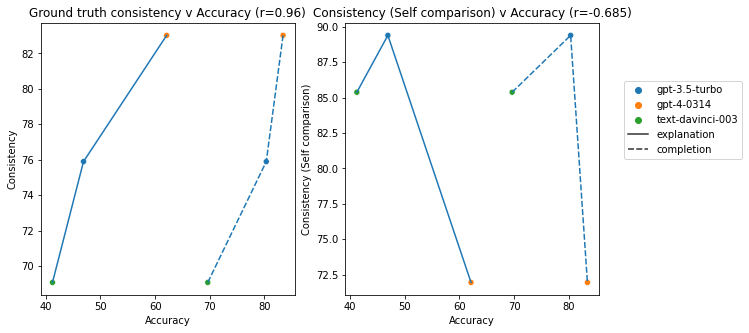

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(10,5))
ax = sns.scatterplot(df_new,
    y='ground_truth_consistent', x='accuracy', hue='model',
    ax=axes[0], legend = False
)
sns.lineplot(df_new,
    y='ground_truth_consistent', x='accuracy', style='style',
             ax=axes[0], legend = False
)
ax.set(ylabel='Consistency', xlabel='Accuracy')
ax.set(title='Ground truth consistency v Accuracy (r=0.96)')

ax = sns.scatterplot(df_new,
    y='self_comparison_consistency', x='accuracy', hue='model', ax=axes[1])
sns.lineplot(df_new,
    y='self_comparison_consistency', x='accuracy', style='style',
             ax=axes[1]
)
ax.set(ylabel='Consistency (Self comparison)', xlabel='Accuracy')
ax.set(title='Consistency (Self comparison) v Accuracy (r=-0.685)')

ax.legend(loc=(1.1, 0.5))
#plt.plot([point[1] for point in points[19:-21]], [point[0] for point 

#plt.plot([point[1] for point in points[19:-21]], [point[0] for point in points[19:-21]])

In [ ]:
ax = sns.scatterplot(to_corr_df,
    y='self_comparison_consistency', x='completion_is_correct', hue='model')
ax.set(ylabel='Consistency (Self comparison)', xlabel='Sequence completion accuracy')
ax.set(title='Consistency (Self comparison) v Sequence completion accuracy (r=-0.49)')
#plt.plot([point[1] for point in points[53:-10]], [point[0] for point in points[53:-10]])

In [20]:
((-0.88 + -0.49) / 2)

-0.685